### The objective of this jupyter noteebok is get the variables that has an near corralation with the price of an airbnb on Seattle.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

seattle_scraped = pd.read_csv('./Seattle/scraped.csv')
seattle_scraped.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20190922030624,2019-09-22,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,Madrona is a hidden gem of a neighborhood. It ...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.21
1,5682,https://www.airbnb.com/rooms/5682,20190922030624,2019-09-22,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.99
2,6606,https://www.airbnb.com/rooms/6606,20190922030624,2019-09-22,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",none,"A peaceful yet highly accessible neighborhood,...",...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.19
3,9419,https://www.airbnb.com/rooms/9419,20190922030624,2019-09-22,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,f,f,moderate,t,t,8,0,8,0,1.29
4,9460,https://www.airbnb.com/rooms/9460,20190922030624,2019-09-22,Downtown Convention Center B&B -- Free Minibar,Take up a glass of wine and unwind on one of t...,Greetings from Seattle. Thanks for considering...,Take up a glass of wine and unwind on one of t...,none,The apartment is situated at the intersection ...,...,t,f,moderate,f,f,4,3,1,0,3.62


In [3]:
seattle_listings = pd.read_csv('./Seattle/listings.csv')
seattle_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61082,-122.29082,Entire home/apt,296,30,28,2019-08-30,0.21,2,84
1,5682,"Cozy Studio, min. to downtown -WiFi",8993,Maddy,Delridge,South Delridge,47.52398,-122.35989,Entire home/apt,48,3,462,2018-11-24,3.99,1,0
2,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65411,-122.33761,Entire home/apt,90,2,147,2019-09-07,1.19,3,85
3,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55062,-122.32014,Private room,62,2,144,2019-09-02,1.29,8,365
4,9460,Downtown Convention Center B&B -- Free Minibar,30832,Siena,Downtown,First Hill,47.61265,-122.32936,Private room,99,3,443,2019-09-02,3.62,4,150


#### We have two diferents data sets that provides an description of each airbnb on seattle, but the second one has a best detail of the proces, so for the facilitie of the cleaning of data we will proceed to merge both datasets seattle_scraped and seattle_listings

In [4]:
seattle_listings_all = pd.merge(left=seattle_listings,right=seattle_scraped, left_on='id', right_on='id')

In [5]:
list(seattle_listings_all.columns)

['id',
 'name_x',
 'host_id_x',
 'host_name_x',
 'neighbourhood_group',
 'neighbourhood_x',
 'latitude_x',
 'longitude_x',
 'room_type_x',
 'price_x',
 'minimum_nights_x',
 'number_of_reviews_x',
 'last_review_x',
 'reviews_per_month_x',
 'calculated_host_listings_count_x',
 'availability_365_x',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name_y',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id_y',
 'host_url',
 'host_name_y',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood_y',
 'neighbourh

#### For create our prediction model we know that each city has a diferent mean of price, for that we need to create dummy variables for each city, with the goal to take this variables in our prediction model

In [6]:
col = "neighbourhood_group_cleansed"
seattle_with_dummy = pd.concat([seattle_listings_all.drop(col, axis=1), pd.get_dummies(seattle_listings_all[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)

In [7]:
list(seattle_with_dummy.columns)

['id',
 'name_x',
 'host_id_x',
 'host_name_x',
 'neighbourhood_group',
 'neighbourhood_x',
 'latitude_x',
 'longitude_x',
 'room_type_x',
 'price_x',
 'minimum_nights_x',
 'number_of_reviews_x',
 'last_review_x',
 'reviews_per_month_x',
 'calculated_host_listings_count_x',
 'availability_365_x',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name_y',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id_y',
 'host_url',
 'host_name_y',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood_y',
 'neighbourh

#### Now that we have created our dummies variables of each city, we will generate a heatmap, with the goal to meet the correlation with each variable with the price variable

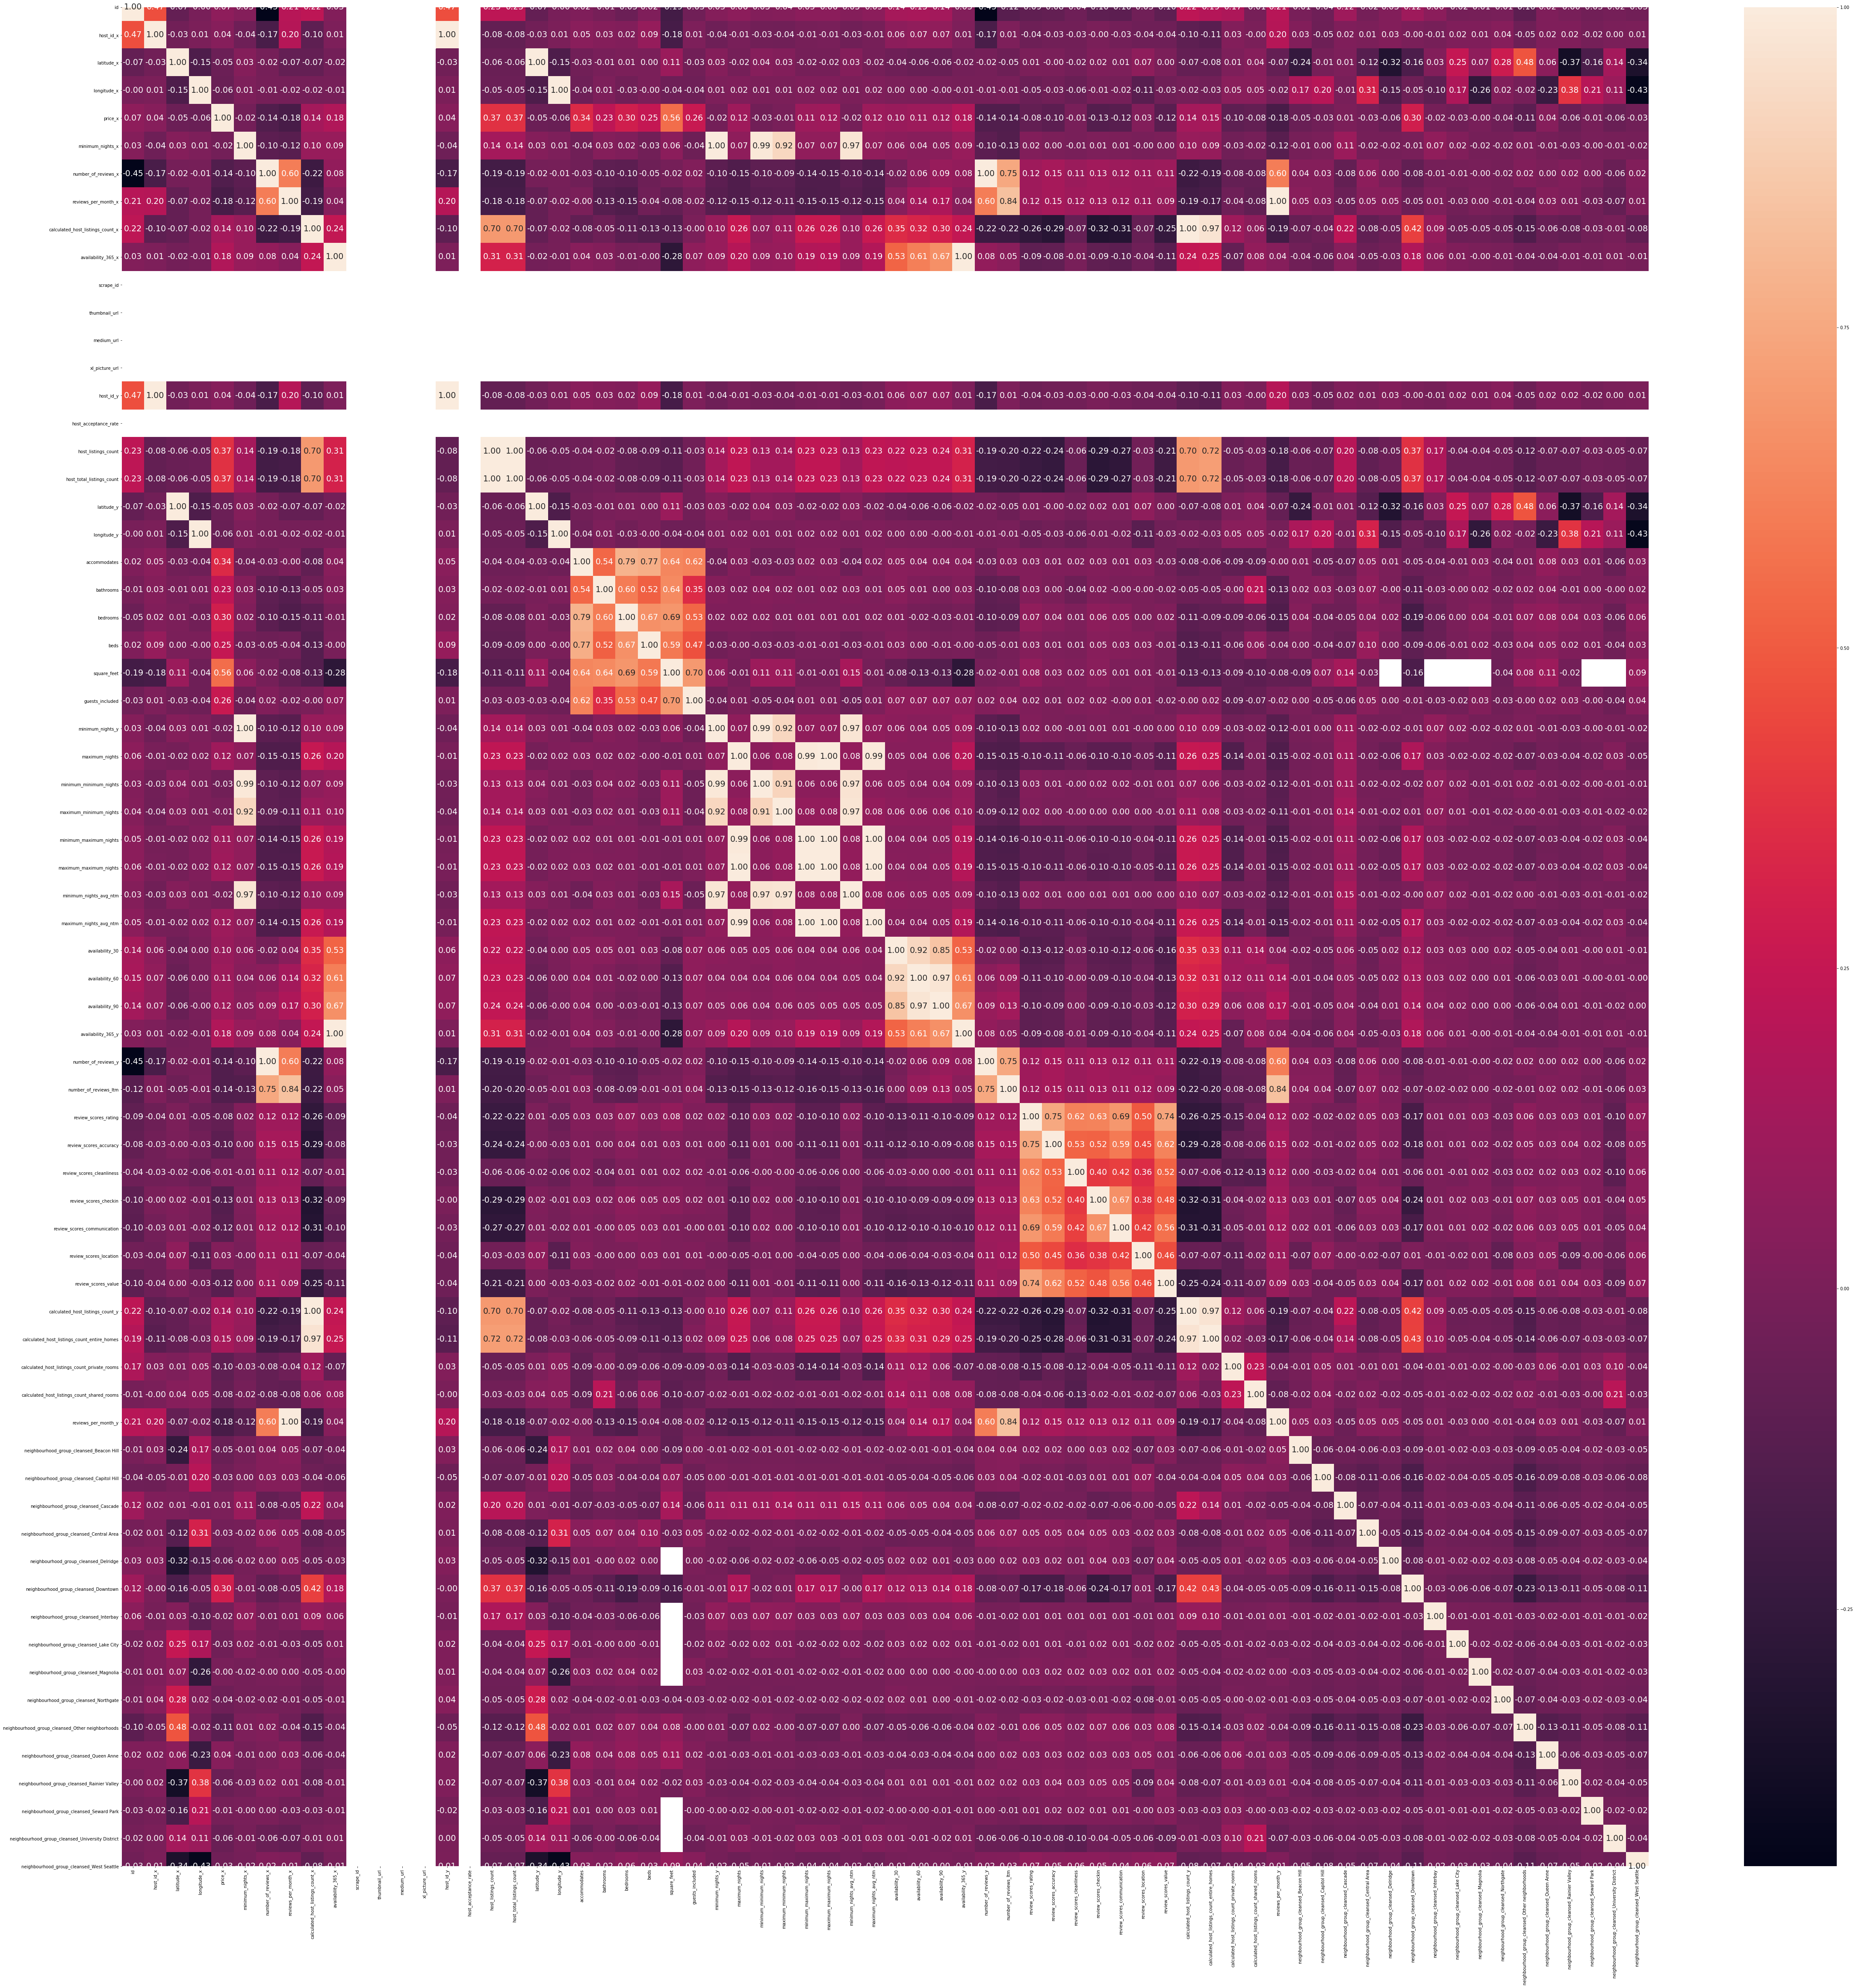

In [8]:
plt.figure(figsize=(80,80))
sns.heatmap(seattle_with_dummy.corr(), annot=True, fmt=".2f", annot_kws={"size": 19});

#### After the heatmap we know that our variables to take in our model are: host_listings_count, host_total_listing_count, accomodates, bedrooms, beds, square_feet, neighbourhood_group_cleansed_Downtown

In [9]:
seattle_data_filtered = seattle_with_dummy[["price_x","host_total_listings_count","accommodates","bedrooms","beds","square_feet","neighbourhood_group_cleansed_Downtown"]]

In [10]:
seattle_data_filtered

,price_x,host_total_listings_count,accommodates,bedrooms,beds,square_feet,neighbourhood_group_cleansed_Downtown
0,296,2.0,9,4.0,4.0,NaN,0
1,48,1.0,2,0.0,1.0,NaN,0
2,90,5.0,2,1.0,1.0,NaN,0
3,62,8.0,2,1.0,1.0,200.0,0
4,99,4.0,2,1.0,1.0,NaN,1
...,...,...,...,...,...,...,...
9035,137,1.0,8,4.0,4.0,NaN,0
9036,35,6.0,1,1.0,0.0,NaN,0
9037,35,0.0,2,1.0,1.0,NaN,0
9038,120,0.0,4,1.0,3.0,NaN,0


#### After filtering our dataset with the variables that have correlation, we will to proceed to get the mean of null rows of each column, with the goal to know if is necessary remove a column or fill the NA. 

In [11]:
seattle_data_filtered.host_total_listings_count.isna().mean()

0.00022123893805309734

In [12]:
seattle_data_filtered.accommodates.isna().mean()

0.0

In [13]:
seattle_data_filtered.bedrooms.isna().mean()

0.00011061946902654867

In [14]:
seattle_data_filtered.beds.isna().mean()

0.000331858407079646

In [15]:
seattle_data_filtered.square_feet.isna().mean()

0.9549778761061947

In [16]:
seattle_data_filtered.neighbourhood_group_cleansed_Downtown.isna().mean()

0.0

In [17]:
seattle_data_filtered.price_x.isna().mean()

0.0

#### The column square_feet has almost 96% of NA values in the column, this are not a right column to take in our model, we are going to proceed to remove that column and fill the NA in the rest of columns with the mean. 

In [18]:
seattle_data_filtered.fillna(seattle_data_filtered.mean(), inplace=True)

/anaconda3/envs/Datascience_blog/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
seattle_data_filtered = seattle_data_filtered.drop(columns="square_feet")

In [20]:
seattle_data_filtered.head()

,price_x,host_total_listings_count,accommodates,bedrooms,beds,neighbourhood_group_cleansed_Downtown
0,296,2.0,9,4.0,4.0,0
1,48,1.0,2,0.0,1.0,0
2,90,5.0,2,1.0,1.0,0
3,62,8.0,2,1.0,1.0,0
4,99,4.0,2,1.0,1.0,1


#### After clean our dataset and taked the corrects variables, this dataset take more sense to take with our model, the variables have more correlation.

#### We proceed to create our model an evalute the accuracy 

In [59]:
#Split into explanatory and response variables
X = seattle_data_filtered[['host_total_listings_count', 'accommodates', 'bedrooms', 'neighbourhood_group_cleansed_Downtown']]
y = seattle_data_filtered['price_x']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.35867494551250234 on 2712 values.'

#### Our model has an accuracy of 35%. We can said that the variables taken has the 35% accuracy of predict the price of an airbnb in seattle

#### After clean our dataset and taked the corrects variables, we have our heatmap like the following, we will proceed to plot our heatmap just using the variables used in the model

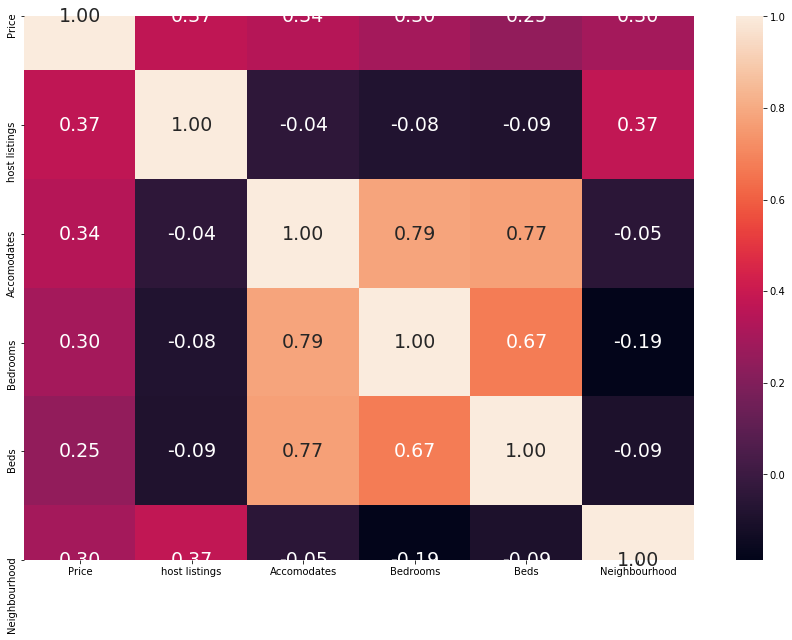

In [28]:
seattle_data_filtered.rename(columns={'price_x':'Price',
                          'host_total_listings_count':'host listings',
                          'accommodates':'Accomodates',
                          'bedrooms': 'Bedrooms',
                          'beds':'Beds',
                           'neighbourhood_group_cleansed_Downtown':'Neighbourhood'}, 
                 inplace=True)

plt.figure(figsize=(15,10))
sns.heatmap(seattle_data_filtered.corr(), annot=True, fmt=".2f", annot_kws={"size": 19});